##Drive Location

In [26]:
%cd /content/drive/MyDrive/Traffic Sign Classification

/content/drive/MyDrive/Traffic Sign Classification


In [27]:
ls

Untitled0.ipynb


##Import Libraries

In [28]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pickle
import pandas as pd
import numpy as np
import random

##Import Dataset and Explore it

In [29]:
# Clonning repo containing the traffic sign dataset
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [30]:
#list dataset contents
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [31]:
#Load csv file
data = pd.read_csv('/content/german-traffic-signs/signnames.csv')

In [32]:
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [33]:
#loading pickled dataset

with open('/content/german-traffic-signs/train.p',mode='rb') as training:
  train = pickle.load(training)

with open('/content/german-traffic-signs/valid.p',mode='rb') as validation:
  valid = pickle.load(validation)

with open('/content/german-traffic-signs/test.p',mode='rb') as testing:
  test = pickle.load(testing)  

In [34]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [35]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


image label=5


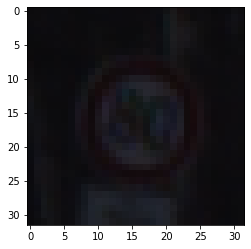

In [36]:
index = np.random.randint(1,len(X_train))
plt.imshow(X_train[index])
print('image label={}'.format(y_train[index]))

##Image Pre-Processing

Converting to grayscale

Histogram Equalization

Normalization

In [37]:
#shuffle the data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [38]:
def preprocessing(img):
  #convert to grayscale
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #Applying histogram equalization
  img = cv2.equalizeHist(img)
  #Normalization
  img = img/255
  return img

In [39]:
X_train_processed = np.array(list(map(preprocessing,X_train)))
X_validation_processed = np.array(list(map(preprocessing,X_validation)))
X_test_processed = np.array(list(map(preprocessing,X_test)))

In [40]:
X_train_processed = X_train_processed.reshape(34799,32,32,1)
X_validation_processed = X_validation_processed.reshape(4410,32,32,1)
X_test_processed = X_test_processed.reshape(12630,32,32,1)

In [41]:
print(X_train_processed.shape)
print(X_validation_processed.shape)
print(X_test_processed.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


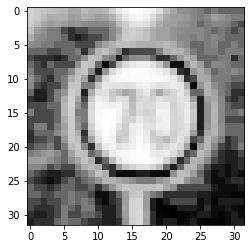

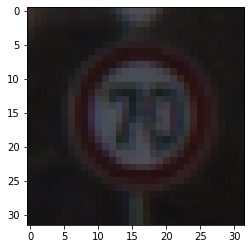

In [42]:
i = random.randint(1,len(X_train))
plt.imshow(X_train_processed[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i].squeeze())

##Build Deep Convolution Neural Network Model

In [43]:
model = Sequential()

#add the convolutional layer
#filters, size of filters, input shape, activation 
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#place a dropout layer
model.add(Dropout(0.25))

#add another convolutional layer
model.add(Conv2D(64,(5,5),activation='relu'))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten the images to 1 dimensional array
model.add(Flatten())

#add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))

#place a dropout layer
#0.5 dropout rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))

#defining the output layer of our network
model.add(Dense(43,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [44]:
model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [45]:
history = model.fit(X_train_processed,
                    y_train,
                    batch_size=500,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_validation_processed,y_validation))

Epoch 1/50
70/70 [==============================] - 1s 11ms/step - loss: 3.5738 - accuracy: 0.0616 - val_loss: 3.4493 - val_accuracy: 0.1458
Epoch 2/50
70/70 [==============================] - 1s 9ms/step - loss: 3.2464 - accuracy: 0.1712 - val_loss: 2.9724 - val_accuracy: 0.3390
Epoch 3/50
70/70 [==============================] - 1s 10ms/step - loss: 2.6202 - accuracy: 0.3469 - val_loss: 2.2652 - val_accuracy: 0.4535
Epoch 4/50
70/70 [==============================] - 1s 9ms/step - loss: 2.0776 - accuracy: 0.4513 - val_loss: 1.7827 - val_accuracy: 0.5240
Epoch 5/50
70/70 [==============================] - 1s 9ms/step - loss: 1.7314 - accuracy: 0.5162 - val_loss: 1.4668 - val_accuracy: 0.6014
Epoch 6/50
70/70 [==============================] - 1s 10ms/step - loss: 1.4850 - accuracy: 0.5729 - val_loss: 1.2287 - val_accuracy: 0.6592
Epoch 7/50
70/70 [==============================] - 1s 10ms/step - loss: 1.3013 - accuracy: 0.6207 - val_loss: 1.0651 - val_accuracy: 0.7204
Epoch 8/50
70/70

##Evaluate Performance of the model

In [46]:
score = model.evaluate(X_test_processed,y_test)
print('Test accuracy',score[1])

395/395 [==============================] - 1s 2ms/step - loss: 0.3073 - accuracy: 0.9184
Test accuracy 0.918368935585022


In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epochs')

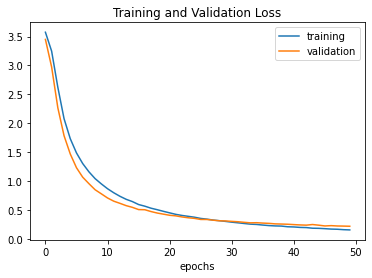

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

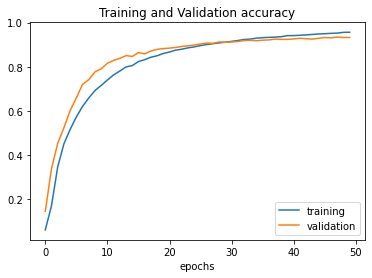

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epochs')

In [50]:
prediction = model.predict_classes(X_test_processed)
y_true_label = y_test

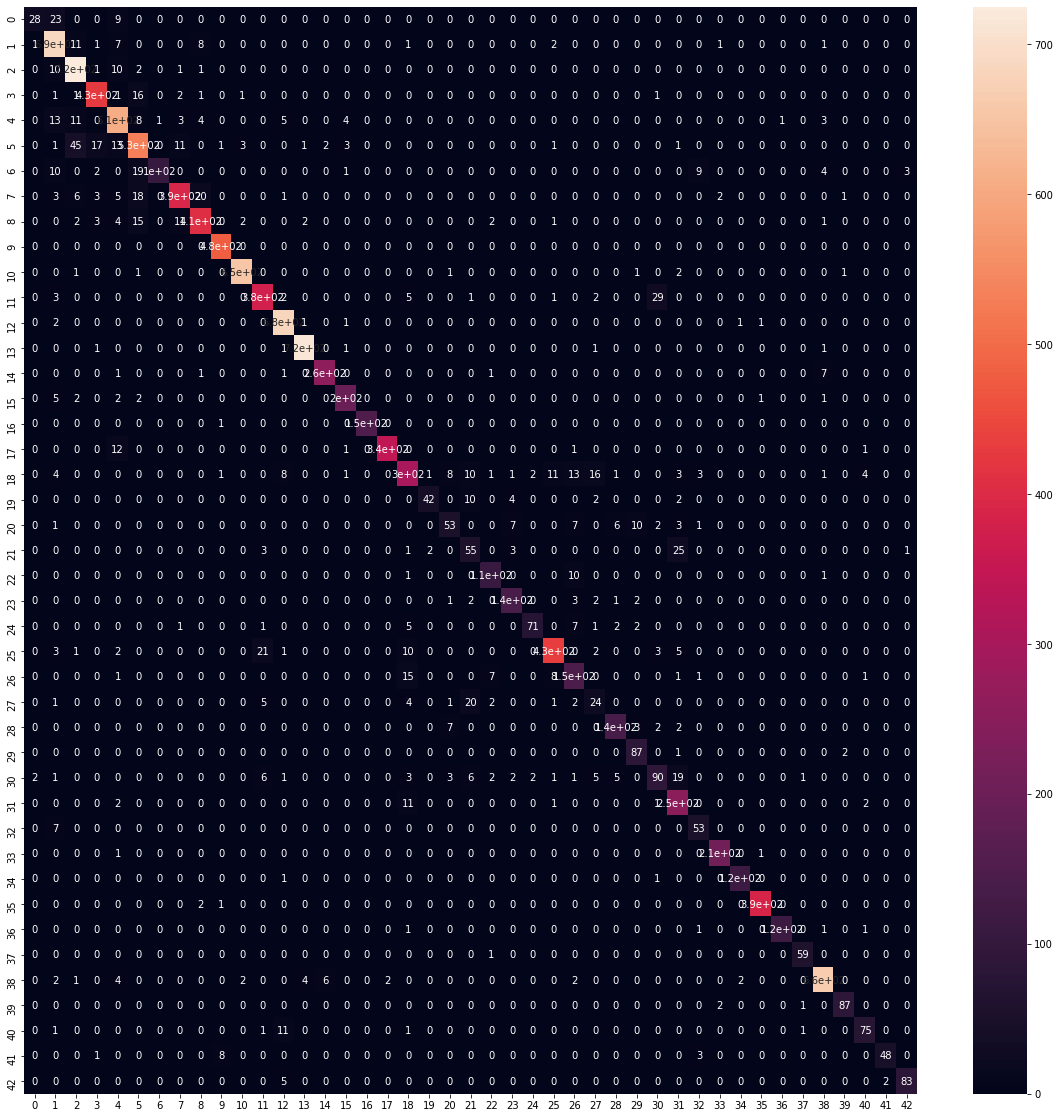

In [51]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true_label,prediction)
plt.figure(figsize=(20,20))
sns.heatmap(matrix,annot=True)

##Prediction

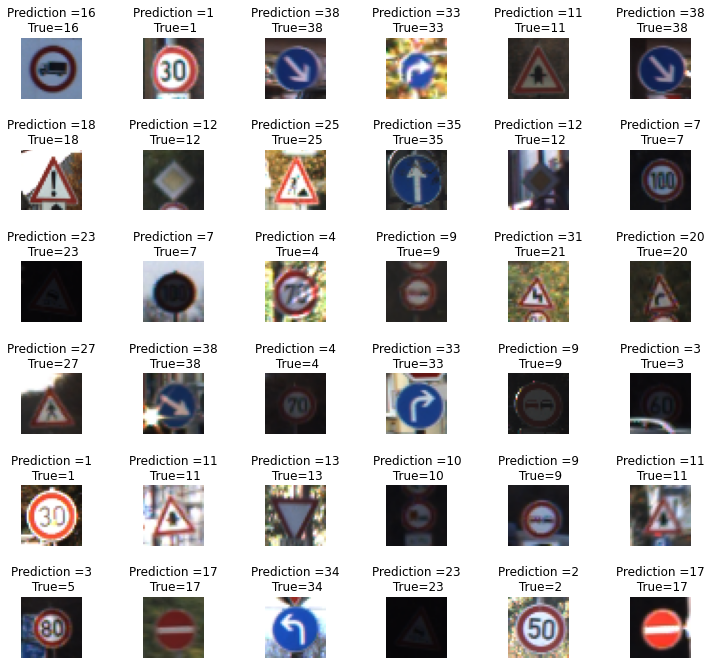

In [52]:
L=6
W=6
fig, axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
for i in range(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction ={}\n True={}'.format(prediction[i],y_true_label[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)  

##Saving Model

In [53]:
model.save('my_model.h5')

##Visualization of Convolutional Neural Network

In [ ]:
https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html